# 필요한 모듈 import

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

# 얼굴 검출 및 랜드마크 검출

## 이미지 불러오기

이미지를 불러오고 BGR을 RGB로 바꿔주기

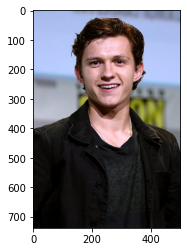

In [2]:
Tom_image = "Tom_Holland.jpg"
img_Tom_bgr = cv2.imread(Tom_image)
img_Tom_show = img_Tom_bgr.copy()
img_Tom_rgb = cv2.cvtColor(img_Tom_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_Tom_rgb)
plt.show()


### cvtColor() 함수 설명
![image-2.png](attachment:image-2.png)
cvtColor()함수의 매개변수
- src : 입력이미지(부호 없는 8비트, 16비트)
- dst : src와 같은 크기와 깊이의 출력 이미지
- code : 색 공간 변환 코드 (COLOR_BGR2RGB, COLOR_RGB2GRAY ... 등)
- dstCn : 대상 이미지의 채널 수 (매개변수가 0이면 채널 수는 src 및 코드에서 자동으로 파생) defalt=0

cvtColor(입력영상, 출력영상, 변환형식)으로 일반적으로 사용한다.

## dlib를 활용 face_detector()하기 
얼굴을 찾고 사각형 박스 씌우기

rectangles[[(159, 118) (345, 304)]]


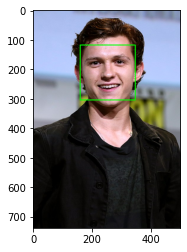

In [3]:
face_detector = dlib.get_frontal_face_detector()

dlib_rects = face_detector(img_Tom_rgb, 1)

print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_Tom_show, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

img_Tom_show_rgb = cv2.cvtColor(img_Tom_show, cv2.COLOR_BGR2RGB)    
plt.imshow(img_Tom_show_rgb)
plt.show()

cv2.rectangle
rectangle() 함수를 이용하여 사각형 그릴 수 있다. rectangle은 시작점(좌측 상단)과 종료점(우측 하단) 두 곳의 좌표만 기입하여 도형을 그린다.

cv2.rectangle(img, pt1, pt2, color, thickness, lineType, shift)

|parameter|내용|
|----|----|
|img|이미지파일|
|pt1|시작점 좌표(x,y)|
|pt2|종료점 좌표(x,y)|
|color|색상(blue,green,red) 0~255|
|thickness|선 두께(default=1)|
|lineType|선 종류 (default cv.Line_8)|
||- LINE_8 : 8-connected line|
||- LINE_4 : 4-connected line|
||- LINE_AA : antialiased line|
|shift|factional bit(default 0)|

## landmark 찾기



In [4]:
model_path = 'shape_predictor_68_face_landmarks.dat'
landmark_pred = dlib.shape_predictor(model_path)

In [5]:
list_landmark = []

for dlib_rect in dlib_rects:
    points = landmark_pred(img_Tom_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmark.append(list_points)
    
print(len(list_landmark[0]))

68


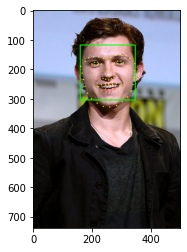

In [6]:
for landmark in list_landmark:
    for point in landmark:
        cv2.circle(img_Tom_show, point, 2, (0 ,255, 255), -1)

img_Tom_show_rgb = cv2.cvtColor(img_Tom_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_Tom_show_rgb)
plt.show()

# 고양이 스티커 위치 지정

이제 랜드마크까지 모두 마쳤으니 고양이 수염을 붙일 위치를 정해야 한다


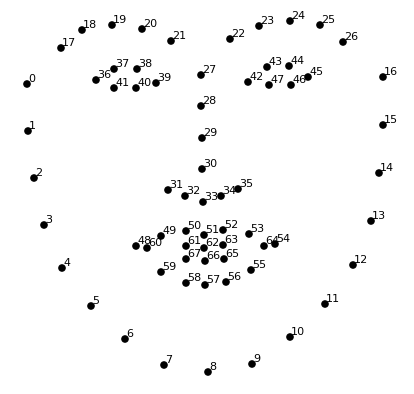

랜드마크 사진을 보면서 적절한 위치를 생각해 보자

In [7]:
for dlib_rect, landmark in zip(dlib_rects, list_landmark):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] 
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))
    

(255, 221)
(x,y) : (255,221)
(w,h) : (187,187)


In [8]:
cat_whiskers = "beard.png"
img_cat = cv2.imread(cat_whiskers)
img_cat = cv2.resize(img_cat, (w,h))
print(img_cat.shape)

(187, 187, 3)


In [9]:
refined_x = x - w//2
refined_y = y - h//2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (162,128)


In [10]:
sticker_area = img_Tom_show[refined_y:refined_y+img_cat.shape[0], refined_x:refined_x+img_cat.shape[1]]
img_Tom_show[refined_y:refined_y+img_cat.shape[0], refined_x:refined_x+img_cat.shape[1]] = np.where(img_cat==255,sticker_area,img_cat).astype(np.uint8)


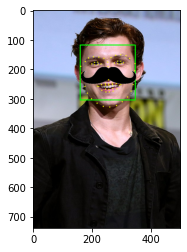

In [11]:
plt.imshow(cv2.cvtColor(img_Tom_show, cv2.COLOR_BGR2RGB))
plt.show()

## 문제점

위에서 x,y,w,h에 대한 이해를 잘 못하는 바람에 많은 시간을 소모했다

```
for dlib_rect, landmark in zip(dlib_rects, list_landmark):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1] 
    w = h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))
```
위 함수가 스티커의 위치와 크기를 설정하는 코드인데 이상하게 이해를 해서 너무 많은 시간을 버렸다
팀원들에게 물어봐도 질문 자체가 이상하니 팀원들과 동문서답만 하다가 퍼실님께 직접 찾아뵙고 처음부터 차근차근 해서 겨우 해결했다
어떻게 이해했는지 작성하고 싶지만 기억이 나지 않는다. 처음에 어떻게 이해하고 있었는지 기억이 안날정도로 이상하게 생각한 것 같다
지금 생각해보니 팀원들이 왜 내 이야기를 못 알아들었는지 너무나 이해가 된다.

이후 고양이 수염 파일을 불러와 좌표를 수정하고 스티커의 범위를 지정해줄때에도 from:to를 잘 해석 했으나 x,y를 반대로 생각하고 앞의 계산을 잘못하니 이상한 좌표를 넘나드는 듯 많이 힘든 여정을 지났다



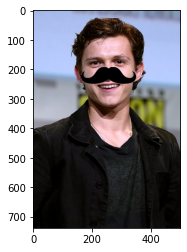

In [12]:
sticker_area = img_Tom_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]]
img_Tom_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]] = np.where(img_cat==255, sticker_area, img_cat).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_Tom_bgr, cv2.COLOR_BGR2RGB))
plt.show()

깔끔하게 완성된 것을 볼 수 있다.

cv2.addWeighted()를 사용해 스티커 뒤로 원본 이미지가 같이 보이도록 해보자


Tom_image = "Tom_Holland.jpg"
img_Tom_bgr = cv2.imread(Tom_image)

sticker_area = img_Tom_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]]

plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
plt.show()

- 이미지 합성 콧수염 투명도 향상
1. 콧수염 투명도 향상
2. sticker_area 선택
3. 합체 ( sticker_area, 콧수염 투명도)
4. 원본 이미지에 합체한 이미지 또 합체


i = cv2.addWeighted(src1 = img_cat, alpha = 0.1, src2 = img_cat, beta = 0.1, gamma = 0)

i

Tom_image = "Tom_Holland.jpg"
img_Tom_bgr = cv2.imread(Tom_image)

# 1번
i = cv2.addWeighted(src1 = img_cat, alpha = 0.1, src2 = img_cat, beta = 0.1, gamma = 0)

src2 = np.where(img_cat==0, img_cat, sticker_area).astype(np.uint8)

# 2번
sticker_area = img_Tom_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]]



plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
plt.show()

cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None)

- src1 : 첫번째 영상
- alpha : 첫 번째 영상 가중치
- src2 : 두 번째 영상 src1과 같은 크기 같은 타입
- beta : 두 번째 영상 가중치
- gamma : 결과 영상에 추가적으로 더할 값
- dst : 가중치 합 결과 영상
- dtype : 출력 영상(dst) 타입


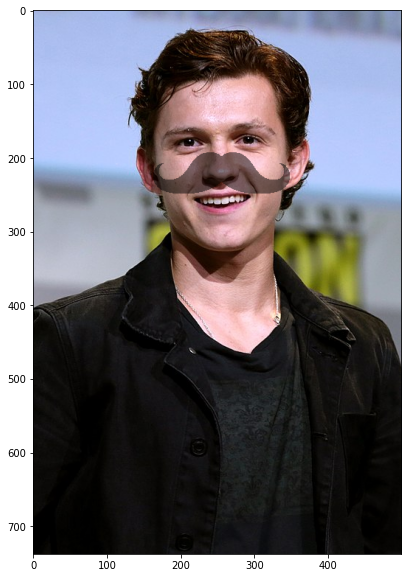

In [46]:
Tom_image = "Tom_Holland.jpg"
img_Tom_bgr = cv2.imread(Tom_image)



sticker_area = img_Tom_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]]

# https://deep-learning-study.tistory.com/115
add = cv2.addWeighted(sticker_area, 0.5, img_cat, 0.3, 0)

img_Tom_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]] = np.where(img_cat==0, add, sticker_area).astype(np.uint8)


plt.figure(figsize=(500,10))
plt.imshow(cv2.cvtColor(img_Tom_bgr, cv2.COLOR_BGR2RGB))
plt.show()

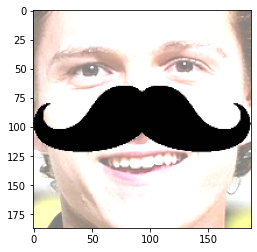

In [14]:
sticker_area = img_Tom_rgb[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]]
img_Tom_rgb[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]] = np.where(img_cat==255, sticker_area, img_cat).astype(np.uint8)

plt.imshow(cv2.addWeighted(img_cat, 0.5, sticker_area, 1, 1))
plt.show()

#### addWeighted 사용하기


처음에 imshow() 메서드에 `cv2.addWeighted`를 적용하니 전체 사진이 아닌 얼굴 사각형에 해당하는 부분만 출력되고
고양이 수염은 그대로 지만 배경 사진이 불투명해지는 오류를 겪었다
addWeighted와 np.where의 이해도가 많이 떨어져

현욱 퍼실님과 다양한 방법을 시도하다가 마지막에 성공하게 되었다
위의 여러 텍스들이 시도해본 결과였다  
하지만 역시나 안될때는 쉬었다 오는 것이 정답인지 점심 식사 후 천천히 코드에 대해서 생각을 하다보니 전체적인 흐름이 생각나게 되었고 아주 간단한 방법으로 성공하게 되었다.  

수염 이미지의 변수가 img_cat인 이유도 처음엔 고양이 수염으로 연습하다가 이미지에 문제가 있는가 해서 그냥 수염으로 바꿔 보았다

처음 작성한 코드는
```python
add = cv2.addWeighted(sticker_area, 0.5, img_cat, 0.3, 0)

sticker_area = img_Tom_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]]

img_Tom_bgr[refined_y:refined_y + img_cat.shape[0], refined_x:refined_x + img_cat.shape[1]] = np.where(img_cat==0, add, sticker_area).astype(np.uint8)
```
였다.

너무 시야가 좁아 당연하게도 add 변수를 선언할 때 sticker_area가 정의되지 않은 상태에서 `addWeighted`를 사용하여 수염 데이터와 합치려고 하다보니 함수가 이상하게 동작해 np.where을 거쳐 출력할 때 수염의 배경이 제대로 지워지지 않은 상태로 나오는 등 여러 이상한 결과값을 계속해서 보게 되었다.

하지만 침착하게 생각해보니 순서의 문제를 깨닫고 코드 줄의 순서만 바꾸는 것으로 간단하게 해결되었다.


노드가 많이 밀려 조급했지만 오히려 한개의 노드를 끝내는 것 보다
문제 해결에 대해서 생각하게되고 연습하는 시간을 가질 수 있어서 좋은 시간이였다.

참 재미 있었따...